# 1. Initializations and Dataset Download
In this cell, we will install the opendatasets library which will allow us to download the data from kaggle directly by just providing the dataset link.

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omaratef3221
Your Kaggle Key: ··········


100%|██████████| 888k/888k [00:00<00:00, 970kB/s]

# 2. Imports
Lets start by getting all our imports. Additionally, we will check if TensorFlow is using the GPU or not. If everything is installed correctly, TensorFlow will use the GPU automatically and in Colab everything is installed for you.

In [3]:
import pandas as pd # Pandas for data manipulation
from sklearn.model_selection import train_test_split # Split data to training, testing and validation
from sklearn.metrics import classification_report # To evaluate our model in depth
import numpy as np # Numpy for mathematical operations
import matplotlib.pyplot as plt # Plotting main library
from tensorflow import keras # Keras main library
import tensorflow as tf # TensorFlow main library
from tensorflow.keras.layers import * # Import all layers of tensorflow
from tensorflow.keras.models import Sequential # Import Sequential class which will help us create the model

print(tf.config.list_physical_devices('GPU')) # Checking if tensorflow is using the GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 3. Dataset
Now lets read the dataset, this lab was developed by Google Colab, so dataset downloaded and read from the path shown below. We will be reading the dataset using pandas read_csv function, then we will remove the nulls/missing data from our dataframe using `dropna` as a filteration process, keep in mind that this process is essential as missing data will stop the code from training. You can skip dropping the missing values if you are 100% sure that there are no missing values in your data. Also, we dropped the id column because it will not affect our classification at all. After that we printed the dataset shape and we used the head() function to visualize the first 5 rows, this step is optional as it just allows us to see the first 5 rows and will not affect the training process.

In [4]:
data = pd.read_csv("/content/rice-type-classification/riceClassification.csv") # Read the data
data.dropna(inplace = True) # Drop missing/null values
data.drop(["id"], axis =1, inplace = True) # Drop Id column
data.head() # Print/visualize the first 5 rows of the data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


# 4. Data Preprocessing
Now as you saw previously, data values are so big which may cause bad results. Its a crucial steps to normalize the dataset before we proceed. Lets normalize the dataset in the cell below. Also, We printed the data shape in the form of (rows, columns) then we printed the output possibilities as we can see its a binary classification. Finally we printed again the first 5 rows of the data again using `data.head()`.

In [5]:
original_df = data.copy() # Copy original dataframe
for column in data.columns:
  data[column] = data[column]/data[column].abs().max() # Normalize existing dataframe
print(data.shape) # print data shape (rows, columns)
print("Output possibilities: ", data["Class"].unique()) # Print possible outputs (0 and 1)
data.head() # Visualize 5 rows again after normalization

(18185, 11)
Output possibilities:  [1. 0.]


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


# 5. Data Analysis
In this part, we will do some data analysis, we printed again the data shape. We also printed if there is any missing values in each column using `data.isnull().sum()` which we expect that there will not be any missing values since we removed them before. We will also print the classes distribution for each class using `data["Class"].value_counts()` and finally we will print some statistical properties using `data.describe()`.

In [6]:
print("Data Shape: ", data.shape) # Print data shape (rows, columns)
print()

print("Missing Values: \n")
print(data.isnull().sum()) # Print missing values
print()

print("Classes Distribution:\n\n", data["Class"].value_counts()) # Print the frequency/distribution of each class

print()
print("Data Summary: \n",)
data.describe() # Gets statistical summary of the data

Data Shape:  (18185, 11)

Missing Values: 

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

Classes Distribution:

 1.0    9985
0.0    8200
Name: Class, dtype: int64

Data Summary: 



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,0.689177,0.827900,0.724498,0.946867,0.656415,0.825608,0.695547,0.691444,0.782536,0.664413,0.549079
std,0.143702,0.067553,0.121884,0.031626,0.136447,0.086884,0.117745,0.058014,0.074397,0.111159,0.497599
min,0.247013,0.404631,0.416833,0.699902,0.234284,0.497004,0.432270,0.387435,0.192971,0.347184,0.000000
25%,0.583937,0.795125,0.622564,0.922260,0.556414,0.764158,0.607429,0.656800,0.719495,0.564574,0.000000
50%,0.652302,0.839924,0.675031,0.954990,0.621639,0.807652,0.678110,0.694357,0.775841,0.665406,1.000000
75%,0.824976,0.873615,0.849860,0.973725,0.785338,0.908282,0.784667,0.733520,0.850270,0.757725,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X = data.iloc[:,:-1]
Y = data.iloc[:, -1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [9]:
print("Training Shape: ", x_train.shape)
print("Validation Shape: ", x_val.shape)
print("Testing Shape: ", x_test.shape)

Training Shape:  (11638, 10)
Validation Shape:  (2910, 10)
Testing Shape:  (3637, 10)


In [11]:
model = tf.keras.Sequential([
  Input(shape = x_train.shape[1]),
  Dense(10, activation = 'relu'),
  Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          validation_data = [x_val, y_val],
          batch_size= 32,
          epochs=10, verbose = 2)

Epoch 1/10
364/364 - 3s - loss: 0.5139 - accuracy: 0.9542 - val_loss: 0.4313 - val_accuracy: 0.9818 - 3s/epoch - 9ms/step
Epoch 2/10
364/364 - 1s - loss: 0.3470 - accuracy: 0.9802 - val_loss: 0.2721 - val_accuracy: 0.9773 - 1s/epoch - 4ms/step
Epoch 3/10
364/364 - 1s - loss: 0.2190 - accuracy: 0.9832 - val_loss: 0.1776 - val_accuracy: 0.9766 - 1s/epoch - 3ms/step
Epoch 4/10
364/364 - 1s - loss: 0.1475 - accuracy: 0.9845 - val_loss: 0.1251 - val_accuracy: 0.9828 - 1s/epoch - 3ms/step
Epoch 5/10
364/364 - 1s - loss: 0.1091 - accuracy: 0.9848 - val_loss: 0.0971 - val_accuracy: 0.9832 - 1s/epoch - 3ms/step
Epoch 6/10
364/364 - 1s - loss: 0.0875 - accuracy: 0.9857 - val_loss: 0.0820 - val_accuracy: 0.9845 - 1s/epoch - 3ms/step
Epoch 7/10
364/364 - 1s - loss: 0.0742 - accuracy: 0.9860 - val_loss: 0.0703 - val_accuracy: 0.9842 - 1s/epoch - 3ms/step
Epoch 8/10
364/364 - 1s - loss: 0.0654 - accuracy: 0.9863 - val_loss: 0.0657 - val_accuracy: 0.9811 - 1s/epoch - 3ms/step
Epoch 9/10
364/364 - 1s 

In [14]:
predictions = model.predict(x_test)
predictions = [(0 if i<0.5 else 1) for i in predictions]
print(classification_report(predictions, y_test))

114/114 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1593
           1       0.99      0.98      0.99      2044

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



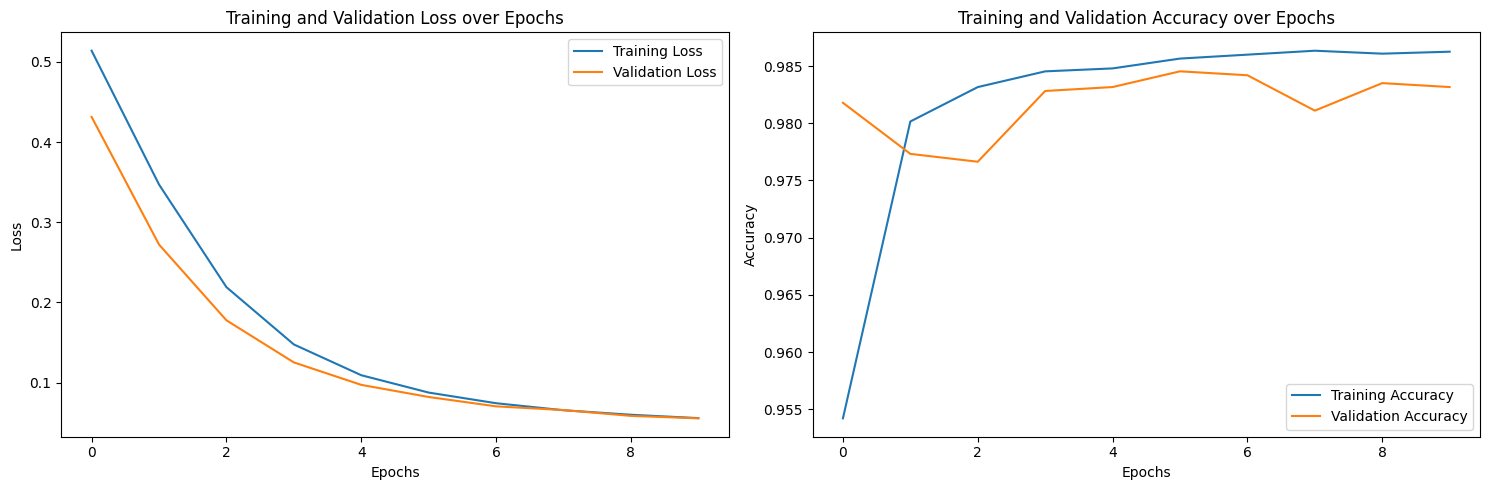

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()

plt.show()